# Correlations Between Stocks


## Loading Data

In [138]:
import pandas as pd

# F X ^RUT TSLA
data = pd.read_csv("./data/changes.csv")
data.head()

,Date,f,x,r2k,tsla
0,10/12/2020,0.042120,0.001174,0.004012,0.000679
1,10/13/2020,-0.007673,0.009703,-0.006507,0.007443
2,10/14/2020,-0.020699,0.017795,-0.009964,0.025612
3,10/15/2020,0.026954,0.034617,0.012354,-0.003176
4,10/16/2020,-0.005188,0.029762,-0.002850,-0.032502


In [139]:
f = data['f']
x = data['x']
r = data['r2k']
t = data['tsla']
# f = pd.Series(data['f'])
# x = pd.Series(data['x'])
type(f)

pandas.core.series.Series

In [79]:
def crosscorr(data_a, data_b, lag=0):
    return data_a.corr(data_b.shift(lag))

def get_correlations(leader, follower, n=10):
    measurements = []

    for i in range(0, 50):
        corr_measure = crosscorr(leader, follower, i)
        measurements.append(corr_measure)
    
    return measurements

0.2170433124798127

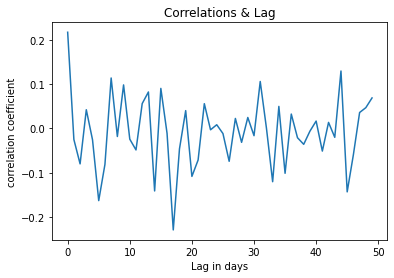

In [90]:
import matplotlib.pyplot as plt

def plot_correlations(correlations):
    plt.plot(list(range(0,len(correlations))), correlations)
    plt.xlabel("Lag in days")
    plt.ylabel("correlation coefficient")
    plt.title("Correlations & Lag")
    plt.show

records = get_correlations(x, t, 100)
plot_correlations(records)
max(records)


# GET DATA

In [143]:
from finnhub import Client

import time
import datetime

def convert_date(string_date):
    # Accepts a date in the format: '01/12/2011'
    return int(time.mktime(datetime.datetime.strptime(string_date, "%d/%m/%Y").timetuple()))

def request_data(api_key, ticker, start, end):
    client = Client(api_key)
    candles = client.stock_candles(
        ticker, 
        'D', 
        convert_date(start), 
        convert_date(end))
    return candles

def percent_change(start, end):
    return (end - start) / start

def process_candles(candles):
    open_price = candles['o']
    close_price = candles['c']
    return [percent_change(open_price[i], close_price[i]) for i in range(0, len(open_price))]

def get_data(key, symbol, start, end):
    candles = request_data(key, symbol, start, end)
    data = process_candles(candles)
    return pd.Series(data)

0.20021628186508325

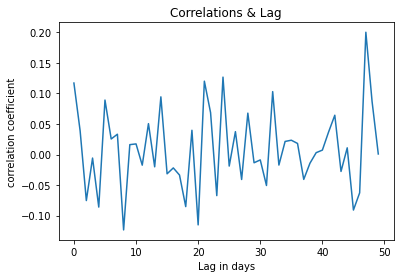

In [157]:
key = api_key="bp03ocnrh5r90eafo9c0"
leader = get_data(key, 'ACN', '10/11/2019', '10/11/2021')
follower = get_data(key, 'AFRM', '10/11/2019', '10/11/2021')

records = get_correlations(leader, follower, 100)

plot_correlations(records)
max(records)